# Problem Statement

A bike-sharing system named BoomBikes is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free in US. BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. This model is build to understand how exactly the demands vary with different features. 

### Reading and Understanding the Data

In [1]:
#Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the packages 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
#reading the data
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#checking the shape
day.shape

(730, 16)

In [5]:
#Info about the data
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### The above information shows that data has no missing values

In [6]:
#Let's check numerical variables
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Looking at above data we can say that linear regression will be suitable for prediction as many numerical variables (temp, atemp, hum, windspeed) including target variable (cnt) have mean and median almost equal.

Since instant column is just index, we can drop it as it will not help in prediction

In [7]:
day.drop('instant', axis=1, inplace=True)

In [8]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [9]:
day['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

We need to convert this column into categorical as system is considering it as numerical

In [10]:
# converting season column into category
def seasons(x):
    if x==1:
        return 'sp'
    elif x==2:
        return 's'
    elif x==3:
        return 'f'
    elif x==4:
        return 'w'
    else:
        return 'N/A'

In [11]:
day['season'] = day['season'].apply(seasons)

In [12]:
day['season'].value_counts()

f     188
s     184
sp    180
w     178
Name: season, dtype: int64

In [13]:
day['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [14]:
# converting mnth cloumn into category
def months(x):
    return x.map({
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
        7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    })

In [15]:
day[['mnth']] = day[['mnth']].apply(months)

In [16]:
day['mnth'].value_counts()

Oct    62
Aug    62
Jul    62
Jan    62
May    62
Mar    62
Dec    62
Jun    60
Apr    60
Nov    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [17]:
day['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [18]:
# same for weekday and weathersit
def days(x):
    return x.map({
        0: 'Mo', 1: 'Tu', 2: 'We', 3: 'Th', 4: 'Fr', 5: 'Sa', 6: 'Su'
    })

def weathers(x):
    return x.map({
        1: 'Clear', 2: 'Cloudy', 3: 'Light-Rain', 4: 'Heavy-Rain'
    })

In [19]:
day[['weekday']] = day[['weekday']].apply(days)
day[['weathersit']] = day[['weathersit']].apply(weathers)

In [20]:
day['weekday'].value_counts()

We    105
Tu    105
Th    104
Su    104
Fr    104
Sa    104
Mo    104
Name: weekday, dtype: int64

In [21]:
day['weathersit'].value_counts()

Clear         463
Cloudy        246
Light-Rain     21
Name: weathersit, dtype: int64

In [22]:
# Lets check the columns details
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 85.7+ KB


In [23]:
# Now lets convert yr, holiday and working day into categorical
def years(x):
    if x==0:
        return '2018'
    elif x==1:
        return '2019'
    else:
        return 'N/A'

def holiday(x):
    if x==1:
        return 'Yes'
    elif x==0:
        return 'No'
    else:
        return 'N/A'
    
def working(x):
    if x==1:
        return 'Yes'
    elif x==0:
        return 'No'
    else:
        return 'N/A'

In [24]:
day['yr'] = day['yr'].apply(years)
day['yr'].value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [25]:
day['holiday'] = day['holiday'].apply(holiday)
day['holiday'].value_counts()

No     709
Yes     21
Name: holiday, dtype: int64

In [26]:
day['workingday'] = day['workingday'].apply(working)
day['workingday'].value_counts()

Yes    504
No     226
Name: workingday, dtype: int64

# Visualizing the data

Let's plot displot for numerical variables

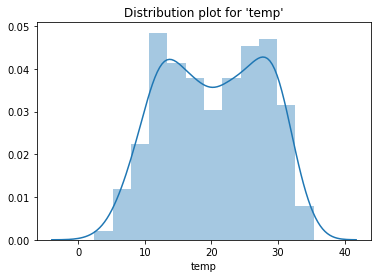

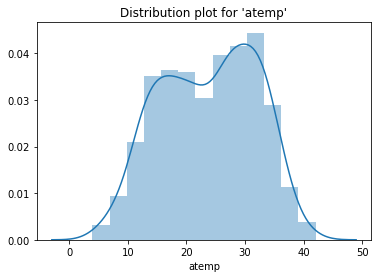

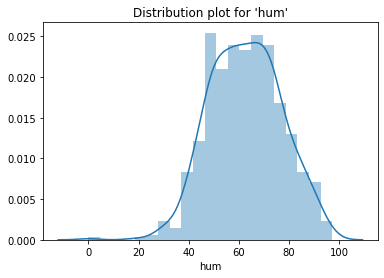

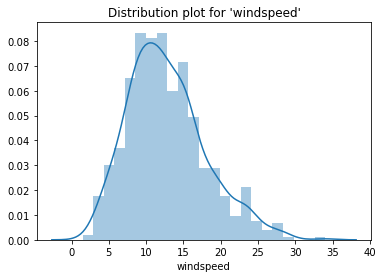

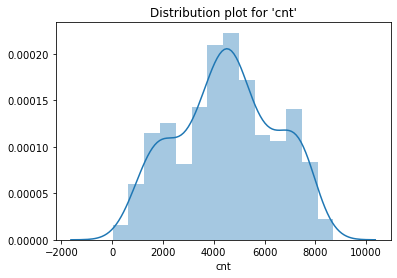

In [27]:
x = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

for i in x:
    sns.distplot(day[i])
    plt.title("Distribution plot for '" + i+"'")
    plt.show()
    print('===================================================')

In [28]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    object 
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    object 
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    object 
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 85.7+ KB


In [29]:
# Lets convert dteday into correct type
day['dteday'] = day['dteday'].astype('datetime64')

In [30]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    object        
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 85.7+ 

In [31]:
day_categorical = day.select_dtypes(exclude=['int64', 'float64', 'datetime64'])
day_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [32]:
len(day_categorical.columns)

7

## Visualising categorical variables

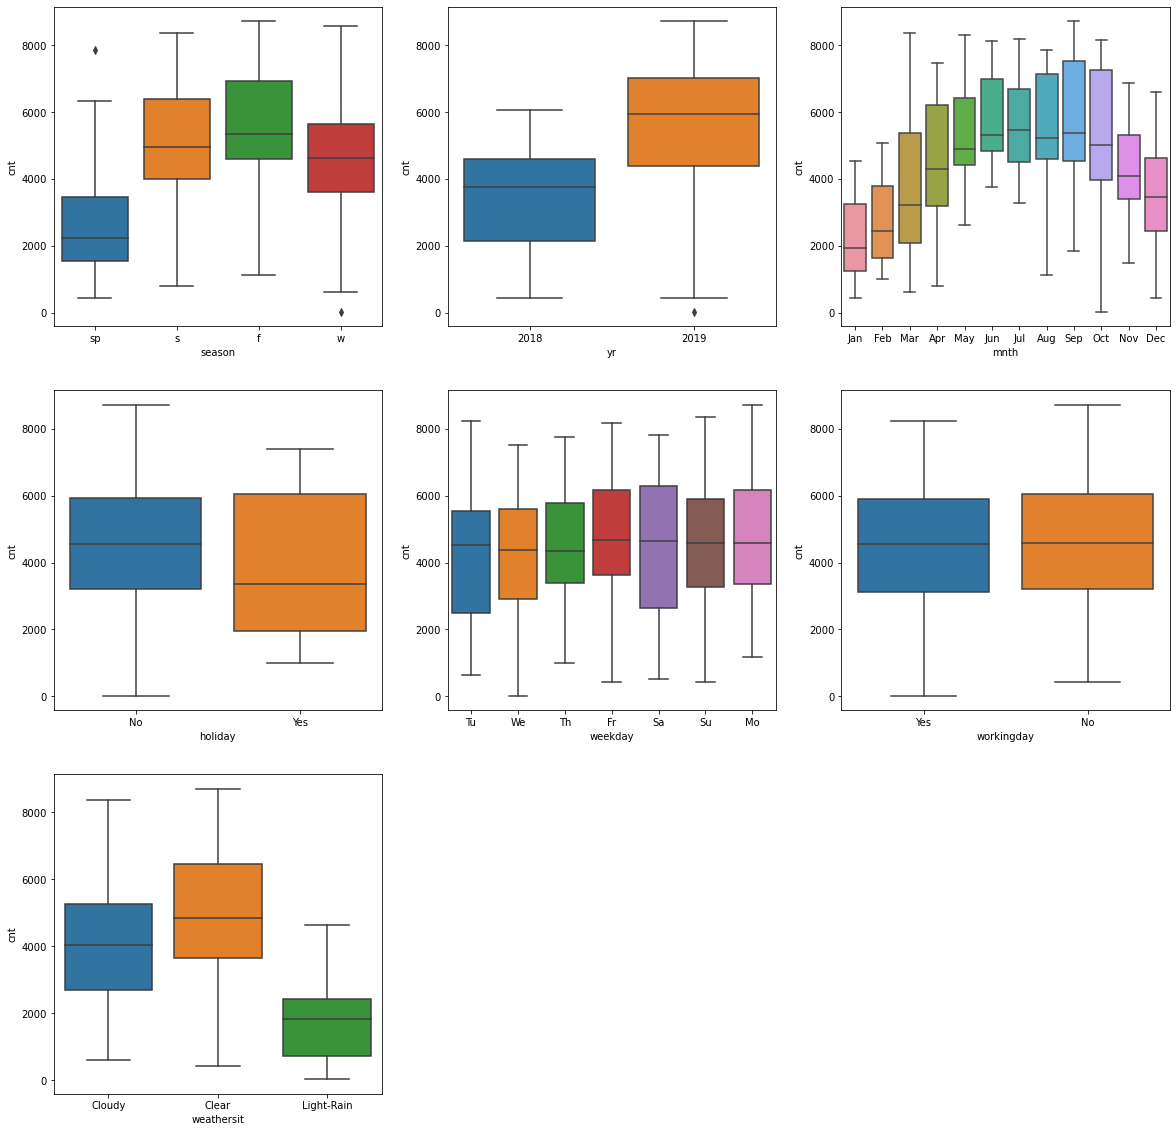

In [33]:
# Visualising categorical variables with boxplot
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=day)

plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=day)

plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=day)

plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=day)

plt.subplot(335)
sns.boxplot(x='weekday', y='cnt', data=day)

plt.subplot(336)
sns.boxplot(x='workingday', y='cnt', data=day)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=day)

plt.show()

After visualising above graph we can see that 'Spring' has upper outlier at 8000 and winter has lower outlier 0 in season column. Also, 2019 has lower outlier at 0 in yr column.

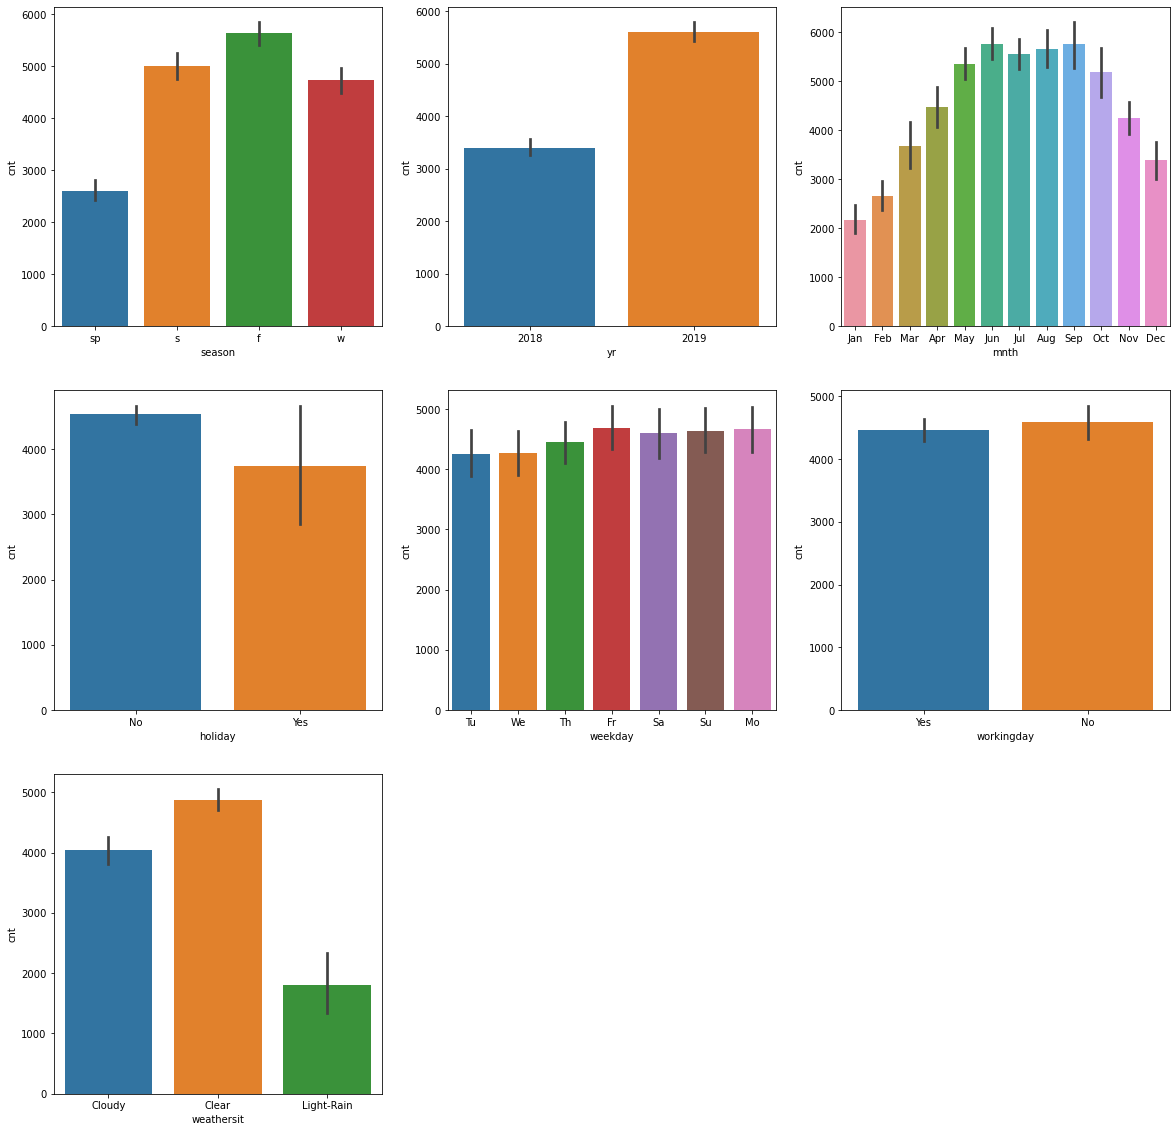

In [34]:
# Visualising categorical variables with barplot
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.barplot(x='season', y='cnt', data=day)

plt.subplot(3,3,2)
sns.barplot(x='yr', y='cnt', data=day)

plt.subplot(3,3,3)
sns.barplot(x='mnth', y='cnt', data=day)

plt.subplot(3,3,4)
sns.barplot(x='holiday', y='cnt', data=day)

plt.subplot(335)
sns.barplot(x='weekday', y='cnt', data=day)

plt.subplot(336)
sns.barplot(x='workingday', y='cnt', data=day)

plt.subplot(3,3,7)
sns.barplot(x='weathersit', y='cnt', data=day)

plt.show()

We can find below insights from above charts:
- Fall has the highest number of bike rentals
- Business grew in 2019 as compared to 2018
- June and Sep have almost same numbers of orders
- People prefer to rent bikes for their way to office
- Friday has the highest hit
- People prefer to rent bikes in day with clear sky

In [35]:
day_numerical = day.select_dtypes(include=['int64', 'float64'])
day_numerical.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

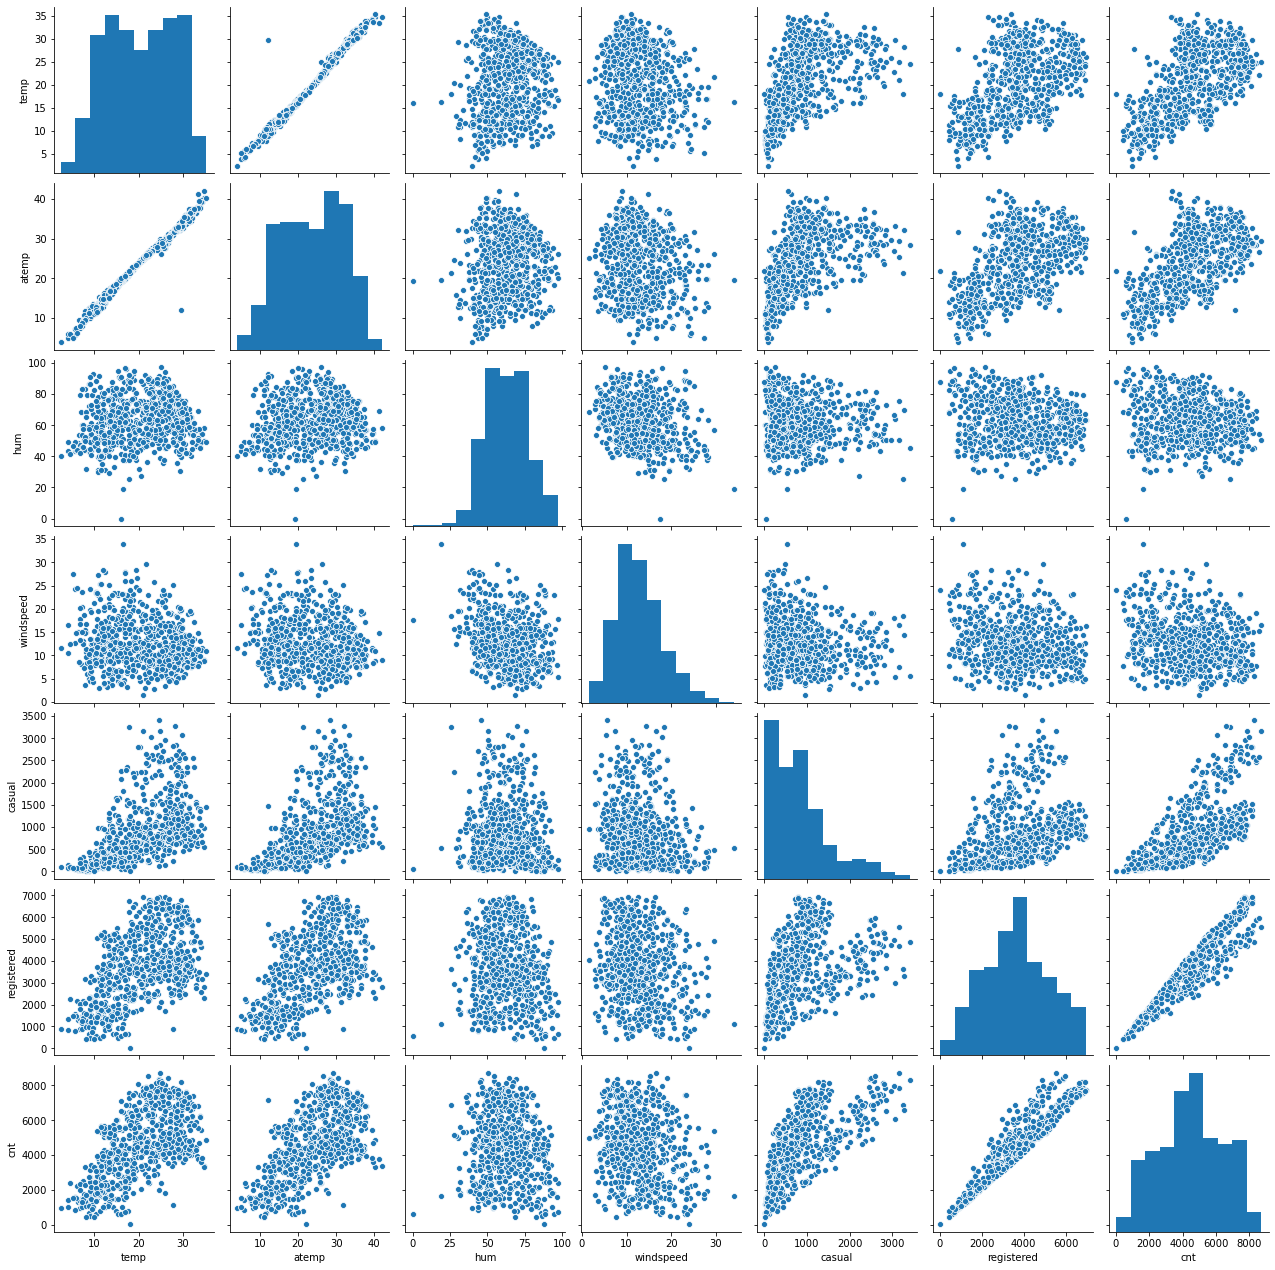

In [36]:
sns.pairplot(day_numerical)
plt.show()

The above pairplots show that following have high multicollinearity:
- temp-atemp
- casual-cnt
- cnt-registered
- casual-registered

Lets check these using correlation or heatmap

In [37]:
# lets look at the correlation
cor = day_numerical.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


We can see from above that 'temp' and 'atemp' are highly correlated to each other that means multicollinearity. We'll deal with this later.

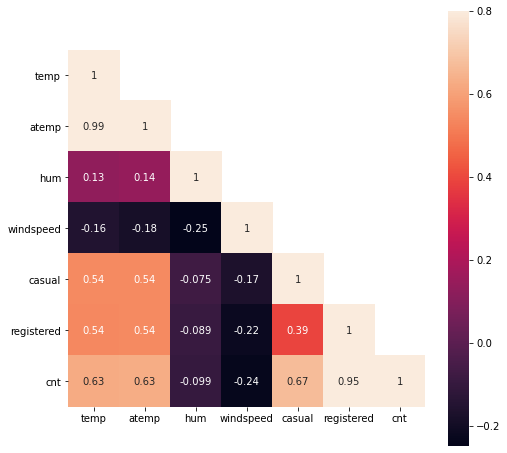

In [38]:
# lets plot heatmap of numerical variables
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
sns.heatmap(cor,annot=True, mask=mask, vmax=0.8, square=True)
plt.show()

Clearly temp and atemp columns have multicollinearity. Lets drop one of them to remove multicollinearity.

In [39]:
# Lets drop atemp column
day.drop('atemp', axis=1, inplace=True)

In [40]:
day.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

# Data Preparation

In [41]:
day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2018-01-01,sp,2018,Jan,No,Tu,Yes,Cloudy,14.110847,80.5833,10.749882,331,654,985
1,2018-02-01,sp,2018,Jan,No,We,Yes,Cloudy,14.902598,69.6087,16.652113,131,670,801
2,2018-03-01,sp,2018,Jan,No,Th,Yes,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,2018-04-01,sp,2018,Jan,No,Fr,Yes,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,2018-05-01,sp,2018,Jan,No,Sa,Yes,Clear,9.305237,43.6957,12.522300,82,1518,1600


In [42]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    object        
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  casual      730 non-null    int64         
 12  registered  730 non-null    int64         
 13  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 80.0+ KB


In [43]:
day_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [44]:
day_dummies = pd.get_dummies(day_categorical[['season', 'mnth', 'weekday', 'weathersit']], drop_first = True)
day_dummies.head()

,season_s,season_sp,season_w,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mo,weekday_Sa,weekday_Su,weekday_Th,weekday_Tu,weekday_We,weathersit_Cloudy,weathersit_Light-Rain
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [45]:
list(day_categorical.columns)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [46]:
day.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

In [47]:
# Lets drop dteday, casual and registered as they are of no use in prediction
day.drop(['dteday', 'casual', 'registered'], axis=1, inplace=True)

In [48]:
day.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt
0,2018,No,Yes,14.110847,80.5833,10.749882,985
1,2018,No,Yes,14.902598,69.6087,16.652113,801
2,2018,No,Yes,8.050924,43.7273,16.636703,1349
3,2018,No,Yes,8.200000,59.0435,10.739832,1562
4,2018,No,Yes,9.305237,43.6957,12.522300,1600


In [49]:
day = pd.concat([day, day_dummies], axis=1)

In [50]:
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_s,season_sp,season_w,...,mnth_Oct,mnth_Sep,weekday_Mo,weekday_Sa,weekday_Su,weekday_Th,weekday_Tu,weekday_We,weathersit_Cloudy,weathersit_Light-Rain
0,2018,No,Yes,14.110847,80.5833,10.749882,985,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,2018,No,Yes,14.902598,69.6087,16.652113,801,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,2018,No,Yes,8.050924,43.7273,16.636703,1349,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2018,No,Yes,8.200000,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2018,No,Yes,9.305237,43.6957,12.522300,1600,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [51]:
# Lets convert yr, holiday and workingday back to 0s and 1s.
def back_years(x):
    if x=='2018':
        return 0
    elif x=='2019':
        return 1
    else:
        return 'N/A'

def back_holiday(x):
    if x=='Yes':
        return 1
    elif x=='No':
        return 0
    else:
        return 'N/A'
    
def back_working(x):
    if x=='Yes':
        return 1
    elif x=='No':
        return 0
    else:
        return 'N/A'

In [52]:
day['yr'] = day['yr'].apply(back_years)
day['holiday'] = day['holiday'].apply(back_holiday)
day['workingday'] = day['workingday'].apply(back_working)

In [53]:
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_s,season_sp,season_w,...,mnth_Oct,mnth_Sep,weekday_Mo,weekday_Sa,weekday_Su,weekday_Th,weekday_Tu,weekday_We,weathersit_Cloudy,weathersit_Light-Rain
0,0,0,1,14.110847,80.5833,10.749882,985,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [54]:
day.shape

(730, 29)

# Model Building

In [55]:
X = day.drop('cnt', axis=1)
y = day.cnt

In [56]:
X.shape

(730, 28)

In [57]:
y.shape

(730,)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
X_train.shape

(584, 28)

In [60]:
y_train.shape

(584,)

In [61]:
X_test.shape

(146, 28)

In [62]:
y_test.shape

(146,)

In [63]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [64]:
var = ['temp', 'hum', 'windspeed']
X_train[var] = scaler.fit_transform(X_train[var])
X_test[var] = scaler.transform(X_test[var])

In [65]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_s,season_sp,season_w,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mo,weekday_Sa,weekday_Su,weekday_Th,weekday_Tu,weekday_We,weathersit_Cloudy,weathersit_Light-Rain
239,0,0,1,1.169798,-0.460004,1.494191,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
97,0,0,0,-0.849259,1.498668,0.480773,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
503,1,0,0,0.587516,-1.212939,-1.385350,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
642,1,0,0,0.669099,0.009068,-1.093395,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
498,1,0,1,0.442477,1.165661,0.294182,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [66]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_s,season_sp,season_w,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mo,weekday_Sa,weekday_Su,weekday_Th,weekday_Tu,weekday_We,weathersit_Cloudy,weathersit_Light-Rain
196,0,0,1,1.058888,-0.294204,0.237423,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
187,0,0,0,1.403349,0.178544,-0.403795,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,0,0,1,-1.406745,-0.909667,-0.419936,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
31,0,0,1,-1.630605,1.450965,-1.786740,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
390,1,0,0,-0.817529,1.022945,-1.523390,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [67]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [68]:
coeff_day = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_day

,Coefficient
yr,1930.126525
holiday,-968.225381
workingday,-632.669481
temp,875.110245
hum,-249.803900
windspeed,-237.083691
season_s,54.018796
season_sp,-810.951747
season_w,649.147210
mnth_Aug,-146.060686


In [69]:
print(lm.intercept_)

4601.065766338155


In [70]:
# Predicting for X_test
y_pred = lm.predict(X_test)

In [71]:
# Checking the difference in predictions
day1 = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})

In [72]:
day1

,Actual,Predicted
196,5923,4053.640777
187,4592,4699.929247
14,1248,1123.210261
31,1360,1033.427099
390,4075,3658.722219
...,...,...
118,4595,4402.779055
566,4459,3656.224953
688,5634,5110.255082
266,5423,4901.613353


In [73]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 592.5103081212916
Mean Squared Error: 573752.4685104527
Root Mean Squared Error: 757.4644998351096


In [74]:
yhat = lm.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8373120128681547 0.8291043306344761


In [75]:
yhat = lm.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8704045149316653 0.8393902108127476


# RFE

In [76]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
X_train.shape

(584, 28)

In [78]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [79]:
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [80]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_sp,season_w,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sep,weekday_Mo,weekday_Su,weekday_Tu,weathersit_Cloudy,weathersit_Light-Rain
239,0,0,1,1.169798,-0.460004,1.494191,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,0,0,0,-0.849259,1.498668,0.480773,0,0,0,0,0,0,0,0,0,1,0,0,1,0
503,1,0,0,0.587516,-1.212939,-1.385350,0,0,0,0,0,0,1,0,0,1,0,0,0,0
642,1,0,0,0.669099,0.009068,-1.093395,0,1,0,0,0,0,0,0,0,0,1,0,0,0
498,1,0,1,0.442477,1.165661,0.294182,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [81]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     142.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.84e-205
Time:                        19:23:22   Log-Likelihood:                -4707.6
No. Observations:                 584   AIC:                             9457.
Df Residuals:                     563   BIC:                             9549.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4451.52

In [82]:
# Lets drop workingday as it has high p-value
X_train_rfe1 = X_train_rfe.drop('workingday', axis=1)
X_train_rfe1.head()

,yr,holiday,temp,hum,windspeed,season_sp,season_w,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sep,weekday_Mo,weekday_Su,weekday_Tu,weathersit_Cloudy,weathersit_Light-Rain
239,0,0,1.169798,-0.460004,1.494191,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97,0,0,-0.849259,1.498668,0.480773,0,0,0,0,0,0,0,0,0,1,0,0,1,0
503,1,0,0.587516,-1.212939,-1.385350,0,0,0,0,0,0,1,0,0,1,0,0,0,0
642,1,0,0.669099,0.009068,-1.093395,0,1,0,0,0,0,0,0,0,0,1,0,0,0
498,1,0,0.442477,1.165661,0.294182,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [83]:
X_train_new1 = build_model(X_train_rfe1, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     150.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.82e-206
Time:                        19:23:22   Log-Likelihood:                -4708.2
No. Observations:                 584   AIC:                             9456.
Df Residuals:                     564   BIC:                             9544.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3861.80

In [84]:
# Now lets drop weekday_Tu
X_train_rfe2 = X_train_rfe1.drop('weekday_Tu', axis=1)
X_train_rfe2.head()

,yr,holiday,temp,hum,windspeed,season_sp,season_w,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sep,weekday_Mo,weekday_Su,weathersit_Cloudy,weathersit_Light-Rain
239,0,0,1.169798,-0.460004,1.494191,0,0,0,0,0,0,0,0,0,0,0,0,0
97,0,0,-0.849259,1.498668,0.480773,0,0,0,0,0,0,0,0,0,1,0,1,0
503,1,0,0.587516,-1.212939,-1.385350,0,0,0,0,0,0,1,0,0,1,0,0,0
642,1,0,0.669099,0.009068,-1.093395,0,1,0,0,0,0,0,0,0,0,1,0,0
498,1,0,0.442477,1.165661,0.294182,0,0,0,0,0,0,1,0,0,0,0,1,0


In [85]:
X_train_new2 = build_model(X_train_rfe2, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     158.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          7.65e-207
Time:                        19:23:22   Log-Likelihood:                -4709.5
No. Observations:                 584   AIC:                             9457.
Df Residuals:                     565   BIC:                             9540.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3826.42

#### Every thing looks good now lets check VIF

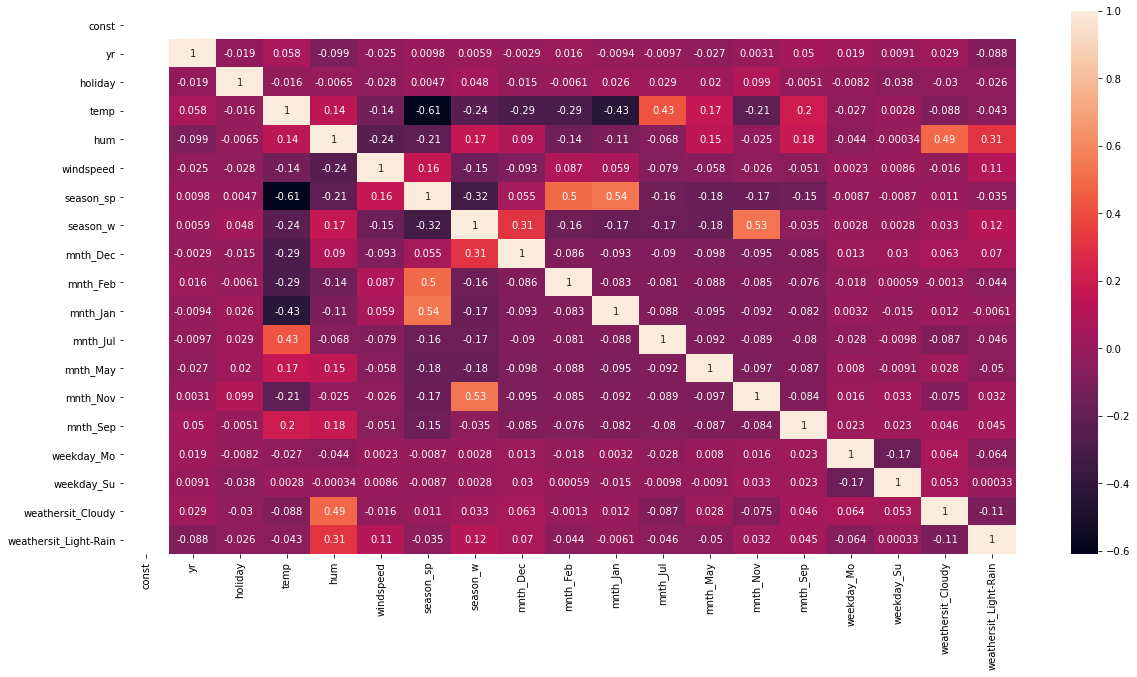

In [86]:
# Lets check for multicollinearity using heatmap first
plt.figure(figsize = (20,10))
sns.heatmap(X_train_new2.corr(),annot = True)
plt.show()

After looking at the heatmap, it does not seem to have multicollinearity. Lets look at VIF.

In [87]:
checkVIF(X_train_new2)

,Features,VIF
0,const,6.77
6,season_sp,3.86
3,temp,3.71
7,season_w,2.49
10,mnth_Jan,2.19
4,hum,2.17
9,mnth_Feb,1.92
13,mnth_Nov,1.76
17,weathersit_Cloudy,1.68
8,mnth_Dec,1.60


### So, the above model has r-squared=0.834 and adj. r-square=0.829. Also, p-value of every value is less than 0.05 and VIF is also under 5 which means the model is good for prediction.

# Residual Analysis of the model

In [88]:
lm = sm.OLS(y_train, X_train_new2).fit()

In [89]:
y_train_cnt = lm.predict(X_train_new2)

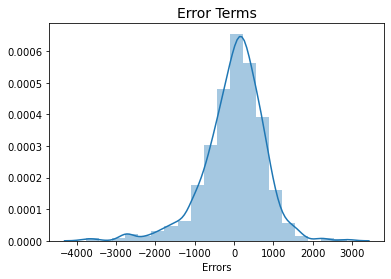

In [90]:
# Plotting the hist of error term in TRAIN
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins=20)
plt.title("Error Terms", fontsize=14)
plt.xlabel("Errors", fontsize=10)
plt.show()

Error terms for TRAIN seems to be normally distributed and mean around 0, therefore, it means that the model has a constant variance i.e. Homoscedasticity.

## Making Predictions Using the Final Model

In [91]:
X_train_new2.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_sp',
       'season_w', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May',
       'mnth_Nov', 'mnth_Sep', 'weekday_Mo', 'weekday_Su', 'weathersit_Cloudy',
       'weathersit_Light-Rain'],
      dtype='object')

In [92]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_s',
       'season_sp', 'season_w', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sep', 'weekday_Mo', 'weekday_Sa', 'weekday_Su', 'weekday_Th',
       'weekday_Tu', 'weekday_We', 'weathersit_Cloudy',
       'weathersit_Light-Rain'],
      dtype='object')

In [93]:
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test)

In [94]:
X_test_final = X_test_new[X_train_new2.columns]

In [95]:
y_test_pred = lm.predict(X_test_final)

## Model Evaluation

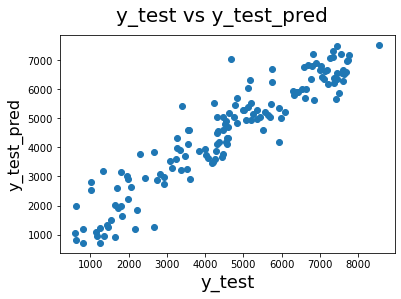

In [96]:
# Plotting y_test and y_test_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

We can see that above graph resembles a line which means our model is descent.

# Thank You